# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
# Import API key
from config import api_key


# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
City_name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
#Set the index counter to 0 to begin with
index_counter = 0
#Set the set counter to begin the steps with 1
set_counter = 1
#Set a maximum number to end the loop after it starts with one in for enumerate loop
limit = 50
#Once the loop index counter hits 50, it assigns the value of maximum limit to 49 for the consecutive loops
new_limit = 49
#Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities, 1):
    # Save config information.
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    
    try:
        
        City_name.append(city_json['name'])
        Lat.append(city_json["coord"]['lat'])
        Lng.append(city_json["coord"]['lon'])
        Max_Temp.append(city_json['main']['temp_max'])
        Humidity.append(city_json['main']['humidity'])
        Cloudiness.append(city_json['clouds']['all'])
        Wind_Speed.append(city_json["wind"]["speed"])
        Country.append(city_json['sys']['country'])
        Date.append(city_json['dt'])
        if index_counter == limit:
            limit = new_limit
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        print(f'Processing Record {index_counter} of Set{set_counter}: {city}')
    
    except:
        print('City not found. Skipping...')
        time.sleep(2)
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Create a data frame from the above data collected  
city_data = pd.DataFrame({'City':City_name,
                          'Lat':Lat,
                          'Lng':Lng,
                          'Max Temp':Max_Temp,
                          'Humidity':Humidity,
                          'Cloudiness':Cloudiness,
                          'Wind Speed':Wind_Speed,
                          'Country':Country,
                          'Date':Date})

Processing Record 1 of Set1: kahului
Processing Record 2 of Set1: manvi
City not found. Skipping...
Processing Record 3 of Set1: hermanus
Processing Record 4 of Set1: pangnirtung
Processing Record 5 of Set1: hobart
Processing Record 6 of Set1: bengkulu
Processing Record 7 of Set1: ahuimanu
Processing Record 8 of Set1: rafai
Processing Record 9 of Set1: lebu
Processing Record 10 of Set1: mataura
Processing Record 11 of Set1: san policarpo
Processing Record 12 of Set1: cuiaba
Processing Record 13 of Set1: baymak
City not found. Skipping...
Processing Record 14 of Set1: khanu woralaksaburi
Processing Record 15 of Set1: rosita
Processing Record 16 of Set1: norman wells
Processing Record 17 of Set1: kapaa
City not found. Skipping...
Processing Record 18 of Set1: taltal
Processing Record 19 of Set1: luwuk
Processing Record 20 of Set1: port alfred
Processing Record 21 of Set1: barrow
Processing Record 22 of Set1: erzin
Processing Record 23 of Set1: tehachapi
Processing Record 24 of Set1: punt

Processing Record 49 of Set4: navrongo
Processing Record 0 of Set5: luneburg
Processing Record 1 of Set5: fairbanks
Processing Record 2 of Set5: nome
City not found. Skipping...
Processing Record 3 of Set5: vuktyl
Processing Record 4 of Set5: yulara
Processing Record 5 of Set5: broome
Processing Record 6 of Set5: padilla
Processing Record 7 of Set5: kattivakkam
Processing Record 8 of Set5: geraldton
City not found. Skipping...
Processing Record 9 of Set5: nishihara
Processing Record 10 of Set5: saint george
Processing Record 11 of Set5: shenjiamen
Processing Record 12 of Set5: hobyo
City not found. Skipping...
Processing Record 13 of Set5: nouadhibou
Processing Record 14 of Set5: zhezkazgan
Processing Record 15 of Set5: airai
Processing Record 16 of Set5: makinsk
Processing Record 17 of Set5: kloulklubed
Processing Record 18 of Set5: yaan
Processing Record 19 of Set5: sakakah
Processing Record 20 of Set5: port-gentil
Processing Record 21 of Set5: palmeirais
Processing Record 22 of Set5

Processing Record 46 of Set8: sinnamary
Processing Record 47 of Set8: akom
Processing Record 48 of Set8: dicabisagan
Processing Record 49 of Set8: raahe
Processing Record 0 of Set9: xuddur
Processing Record 1 of Set9: xinqing
Processing Record 2 of Set9: akdepe
Processing Record 3 of Set9: mehamn
Processing Record 4 of Set9: brigantine
Processing Record 5 of Set9: poum
Processing Record 6 of Set9: usinsk
Processing Record 7 of Set9: poronaysk
Processing Record 8 of Set9: wuda
Processing Record 9 of Set9: tromso
Processing Record 10 of Set9: sawtell
Processing Record 11 of Set9: north bend
Processing Record 12 of Set9: soyo
Processing Record 13 of Set9: huarmey
Processing Record 14 of Set9: amberley
Processing Record 15 of Set9: pangoa
Processing Record 16 of Set9: changqing
Processing Record 17 of Set9: teya
Processing Record 18 of Set9: constitucion
Processing Record 19 of Set9: bartica
Processing Record 20 of Set9: andrelandia
Processing Record 21 of Set9: cairns
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,77.02,77,40,13.80,US,1632288840
1,Mānvi,15.9833,77.0500,83.70,63,99,11.07,IN,1632288841
2,Hermanus,-34.4187,19.2345,55.80,78,2,13.51,ZA,1632288843
3,Pangnirtung,66.1451,-65.7125,30.43,59,54,4.90,CA,1632288844
4,Hobart,-42.8794,147.3294,72.10,35,0,19.57,AU,1632288559


In [15]:
city_data.to_csv(output_data_file, encoding= "utf-8", index = False, header= True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
city_data.describe()

In [2]:
#  Get the indices of cities that have humidity over 100%.
humidityover100 = city_data.loc[city_data["Humidity"] > 100]
humidityover100.index

In [3]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
afterdropping = city_data.drop(humidityover100.index,  inplace = False)
afterdropping.head()

In [17]:
city_data_duplicate = pd.DataFrame({'City':City_name,
                                    'Lat':Lat,
                                    'Lng':Lng,
                                    'Max Temp':Max_Temp,
                                    'Humidity':Humidity,
                                    'Cloudiness':Cloudiness,
                                    'Wind Speed':Wind_Speed,
                                    'Country':Country,
                                    'Date':Date})
city_data_duplicate.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,77.02,77,40,13.80,US,1632288840
1,Mānvi,15.9833,77.0500,83.70,63,99,11.07,IN,1632288841
2,Hermanus,-34.4187,19.2345,55.80,78,2,13.51,ZA,1632288843
3,Pangnirtung,66.1451,-65.7125,30.43,59,54,4.90,CA,1632288844
4,Hobart,-42.8794,147.3294,72.10,35,0,19.57,AU,1632288559


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot



In [20]:
humidity = city_data_duplicate["Humidity"]
quartiles = humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_humidity = city_data_duplicate.loc[(city_data_duplicate['Humidity'] < lower_bound) | (city_data_duplicate['Humidity'] > upper_bound)]
outlier_humidity

outlier_humidity.index
clean_city_data = city_data_duplicate.drop(outlier_humidity.index,  inplace = False)
clean_city_data.head()


The lower quartile of Humidity is: 56.0
The upper quartile of Humidity is: 86.0
The interquartile range of Humidity is: 30.0
The the median of Humidity is: 73.0 
Values below 11.0 could be outliers.
Values above 131.0 could be outliers.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,77.02,77,40,13.80,US,1632288840
1,Mānvi,15.9833,77.0500,83.70,63,99,11.07,IN,1632288841
2,Hermanus,-34.4187,19.2345,55.80,78,2,13.51,ZA,1632288843
3,Pangnirtung,66.1451,-65.7125,30.43,59,54,4.90,CA,1632288844
4,Hobart,-42.8794,147.3294,72.10,35,0,19.57,AU,1632288559


## Latitude vs. Humidity Plot

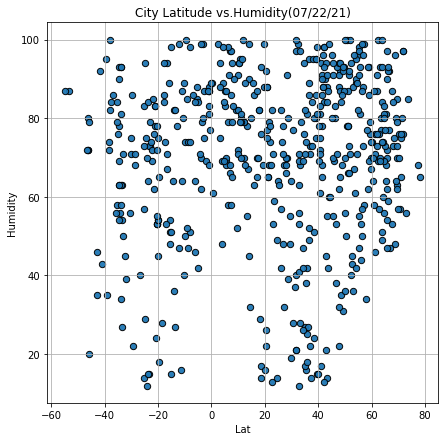

In [24]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Humidity(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("Fig 1.png")
plt.show()

## Latitude vs. Cloudiness Plot

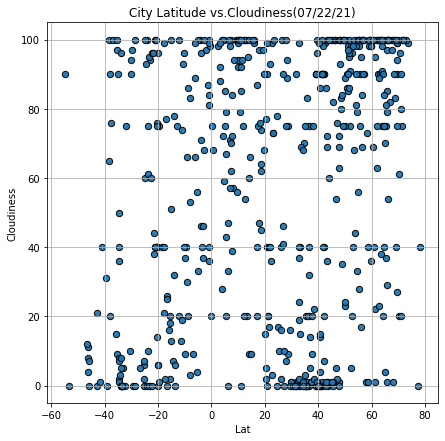

In [25]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Cloudiness(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("Fig2.png")
plt.show()


## Latitude vs. Wind Speed Plot

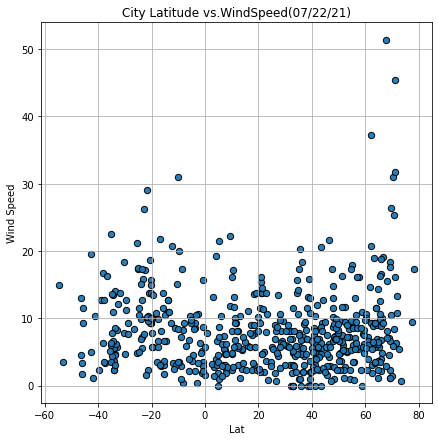

In [26]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed",
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.WindSpeed(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("Fig3.png")
plt.show()

## Linear Regression

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,77.02,77,40,13.80,US,1632288840
1,Mānvi,15.9833,77.0500,83.70,63,99,11.07,IN,1632288841
3,Pangnirtung,66.1451,-65.7125,30.43,59,54,4.90,CA,1632288844
6,‘Āhuimanu,21.4447,-157.8378,80.31,68,40,13.80,US,1632288845
7,Rafai,4.9500,23.9167,70.48,87,85,1.92,CF,1632288845


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
Nothern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]>=0]
Nothern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,77.02,77,40,13.80,US,1632288840
1,Mānvi,15.9833,77.0500,83.70,63,99,11.07,IN,1632288841
3,Pangnirtung,66.1451,-65.7125,30.43,59,54,4.90,CA,1632288844
6,‘Āhuimanu,21.4447,-157.8378,80.31,68,40,13.80,US,1632288845
7,Rafai,4.9500,23.9167,70.48,87,85,1.92,CF,1632288845


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [30]:
Southern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]<0]
Southern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Hermanus,-34.4187,19.2345,55.80,78,2,13.51,ZA,1632288843
4,Hobart,-42.8794,147.3294,72.10,35,0,19.57,AU,1632288559
5,Bengkulu,-3.8004,102.2655,83.82,70,46,8.61,ID,1632288844
8,Lebu,-37.6167,-73.6500,49.93,84,76,3.33,CL,1632288846
9,Mataura,-46.1927,168.8643,52.48,72,8,3.29,NZ,1632288846


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0006660014487980668


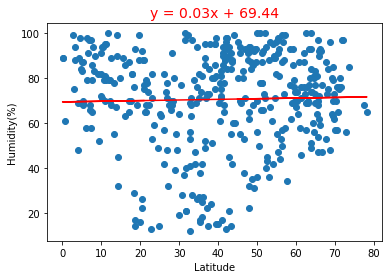

(Northern Hemisphere  - Humidity (%) vs. Latitude)R square value is: 0.0006660014487980668
(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is: y = 0.03x + 69.44


In [32]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("Fig 5.png")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011560119680734702


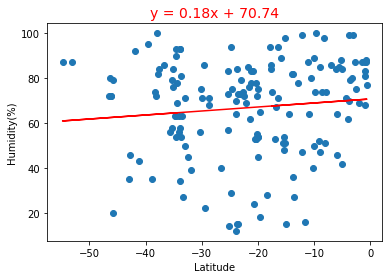

(Southern Hemisphere- Humidity (%) vs. Latitude)R square value is: 0.011560119680734702
(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is: y = 0.18x + 70.74


In [33]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("Fig 7.png")
plt.show()
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.021029842355509337


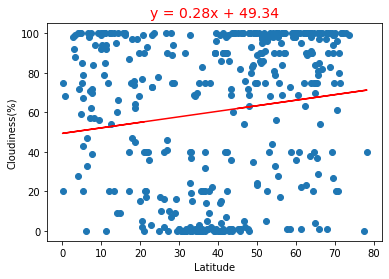

(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R square value is: 0.021029842355509337
(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is: y = 0.28x + 49.34


In [35]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("Fig 9.png")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08924855531627635


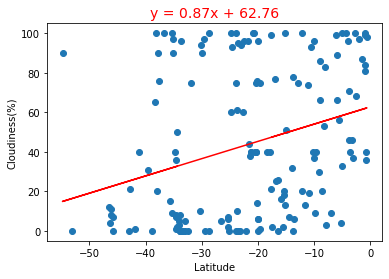

(Southern Hemisphere- Cloudiness(%) vs. Latitude)R square value is: 0.08924855531627635
(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is: y = 0.87x + 62.76


In [36]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("Fig 10 .png")
plt.show()
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04033613673198886


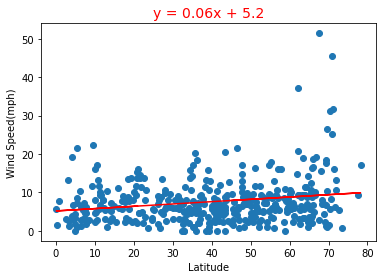

(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is: 0.04033613673198886
(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is: y = 0.06x + 5.2


In [37]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
northern_hemisphere_rvalue = rvalue**2
print(f"The r-value is: {rvalue**2}")
plt.savefig("Fig 11.png")
plt.show()
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005860101153033933


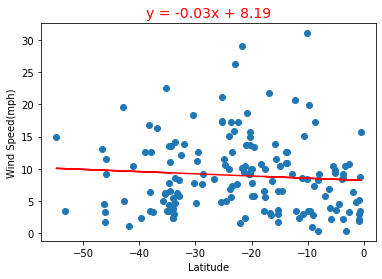

(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is: 0.005860101153033933
(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is: y = -0.03x + 8.19


In [38]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("Fig 12.png")
plt.show()
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )